Importing relevant files

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


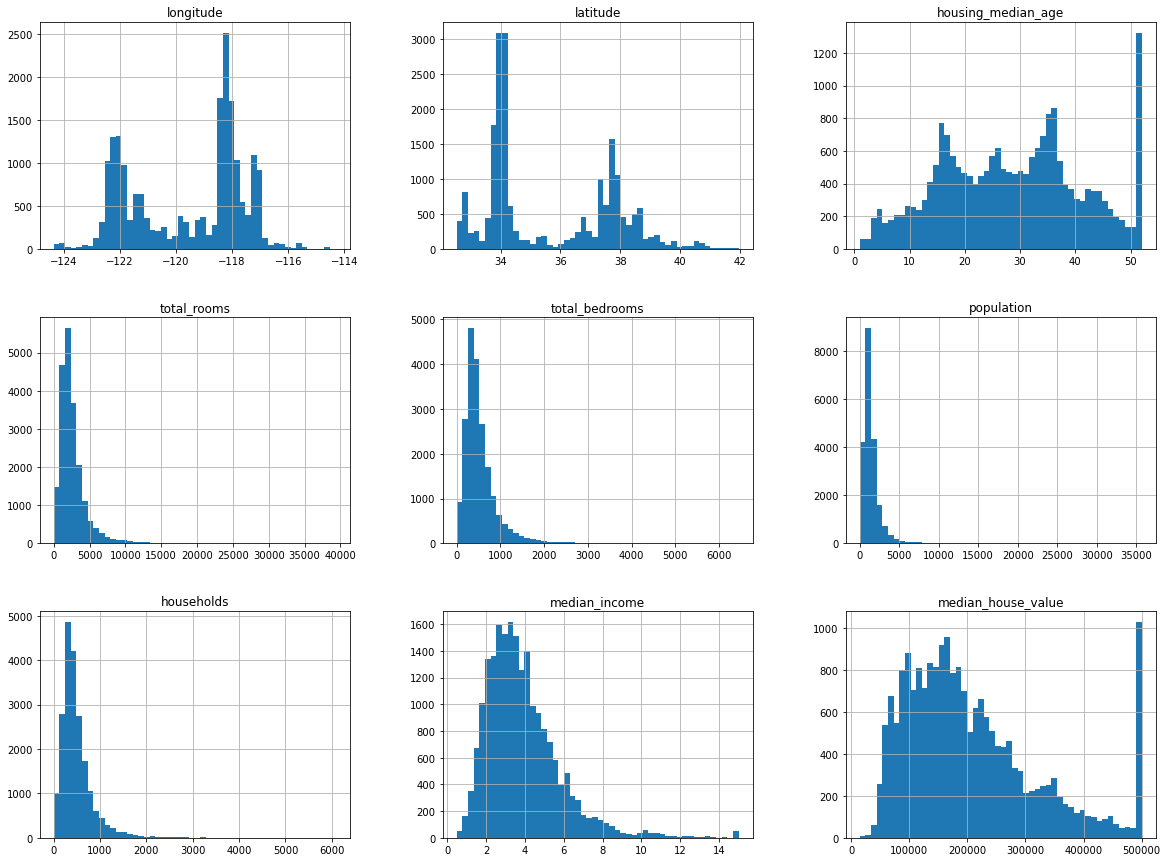

In [6]:
housing.hist(bins = 50, figsize = (20,15))
plt.show()

In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 0)

<AxesSubplot:>

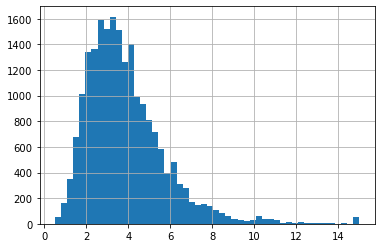

In [9]:
housing["median_income"].hist(bins = 50)

In [10]:
housing["income_cat"] = pd.cut(housing["median_income"],
      bins = [0., 1.5, 3.0, 4.5, 6, np.inf],
      labels = [1, 2, 3, 4, 5])

<AxesSubplot:>

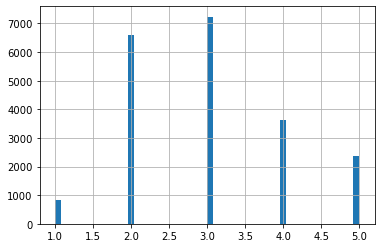

In [11]:
housing["income_cat"].hist(bins = 50)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 0)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [14]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [15]:
for dataset in (strat_train_set, strat_test_set, housing):
    dataset.drop("income_cat", axis = 1, inplace = True)

In [16]:
housing = strat_train_set.copy()

Visualize the geographical data

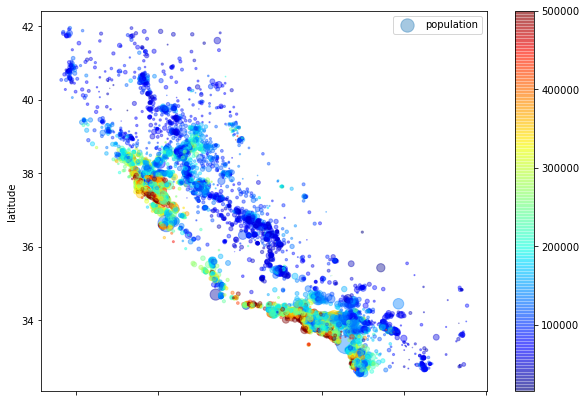

In [17]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
            s = housing["population"]/100, label = "population",
            c = housing["median_house_value"], cmap = "jet", colorbar = True, figsize = (10,7))
plt.legend()

<AxesSubplot:>

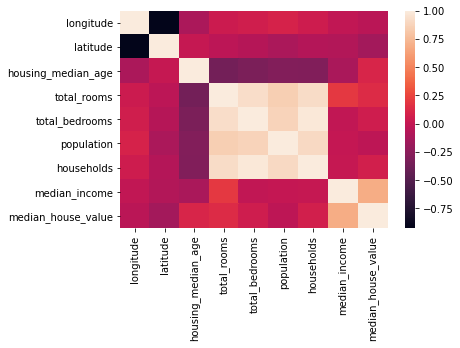

In [18]:
sns.heatmap(housing.corr())

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='longitude', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='population', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='longitude'>,
        <AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='population', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='longitude'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='latitude'>,
        <AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='population', ylabel='latitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='l

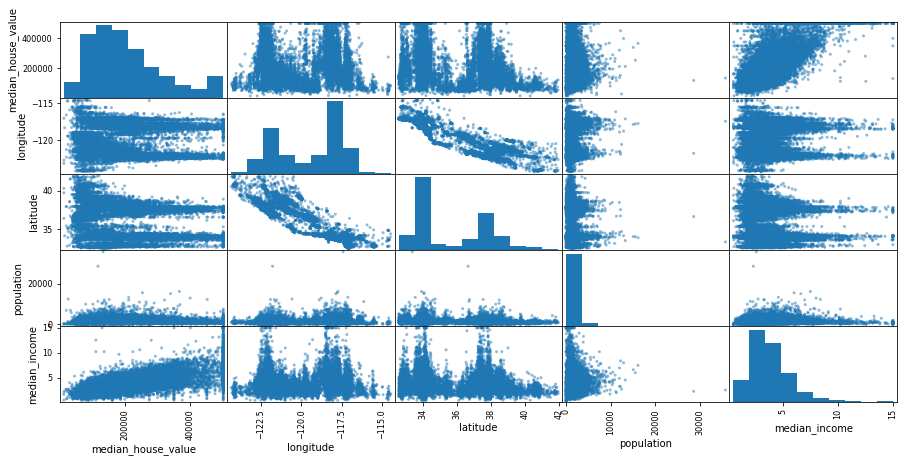

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "longitude", "latitude", "population", "median_income"]

scatter_matrix(housing[attributes], figsize = (15,7))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

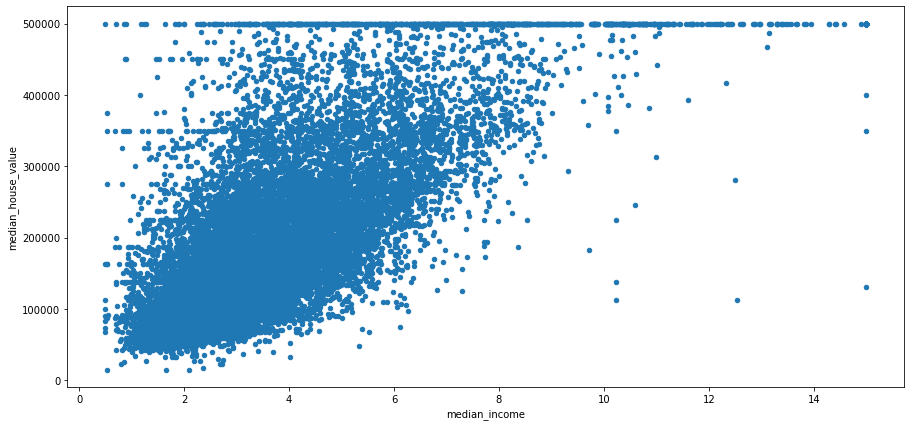

In [20]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", figsize = (15,7))

In [21]:
housing["median_house_value"].value_counts(sort = "desc")

500001.0    768
162500.0     94
137500.0     93
112500.0     83
225000.0     77
           ... 
62400.0       1
379300.0      1
380600.0      1
427200.0      1
289700.0      1
Name: median_house_value, Length: 3666, dtype: int64

In [22]:
capped_val_remove = [500001.0, 137500.0, 162500.0, 112500.0, 225000.0, 187500.0, 350000.0, 87500.0, 100000.0, 275000.0,
                    150000.0, 175000.0]

for value in capped_val_remove:
    housing = housing[housing.median_house_value != value]

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

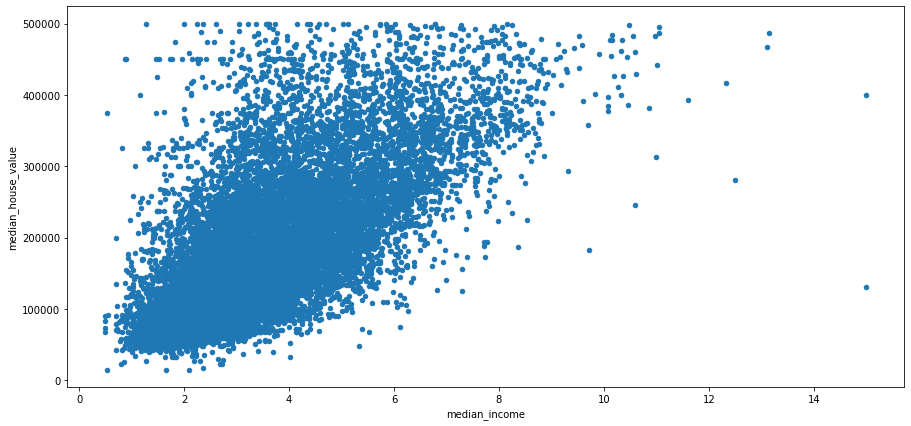

In [23]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", figsize = (15,7))

In [24]:
housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["households"]
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

<AxesSubplot:>

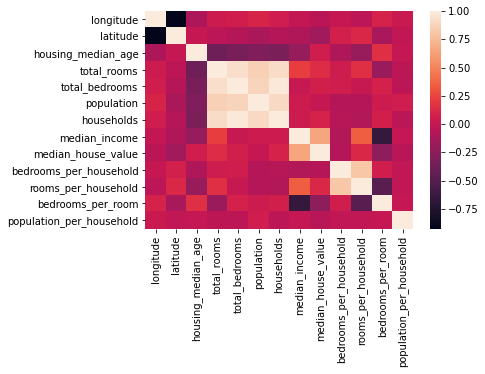

In [25]:
sns.heatmap(housing.corr())

In [26]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"]

In [27]:
housing.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
dtype: bool

In [28]:
housing[housing.isna().any(axis = 1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13069,-121.30,38.58,16.0,1537.0,NaN,1125.0,375.0,2.6471,INLAND
2028,-119.75,36.71,38.0,1481.0,NaN,1543.0,372.0,1.4577,INLAND
13311,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND
6590,-118.18,34.19,48.0,1371.0,NaN,528.0,155.0,15.0001,<1H OCEAN
17825,-121.88,37.40,9.0,6751.0,NaN,4240.0,1438.0,5.3400,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
5990,-117.73,34.10,37.0,3457.0,NaN,1344.0,530.0,5.8891,INLAND
15030,-117.02,32.78,31.0,2567.0,NaN,1198.0,499.0,3.4659,<1H OCEAN
18261,-122.08,37.37,29.0,1229.0,NaN,707.0,194.0,7.1108,NEAR BAY
4046,-118.49,34.13,24.0,4394.0,NaN,1443.0,528.0,11.2979,<1H OCEAN


In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

housing_numerical_attributes = housing.drop("ocean_proximity", axis = 1)
imputer.fit(housing_numerical_attributes)

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2128.5   ,  436.    , 1167.    ,
        410.    ,    3.5341])

In [31]:
X = imputer.transform(housing_numerical_attributes)
X

array([[-1.1787e+02,  3.3860e+01,  2.8000e+01, ...,  2.1970e+03,
         5.0900e+02,  3.4856e+00],
       [-1.2157e+02,  3.9130e+01,  3.0000e+01, ...,  4.1300e+02,
         8.8000e+01,  1.5694e+00],
       [-1.1905e+02,  3.4400e+01,  5.0000e+01, ...,  1.0790e+03,
         2.5700e+02,  2.6991e+00],
       ...,
       [-1.1830e+02,  3.4250e+01,  4.4000e+01, ...,  8.5900e+02,
         2.9200e+02,  4.5833e+00],
       [-1.2191e+02,  3.7310e+01,  4.6000e+01, ...,  1.3730e+03,
         5.9000e+02,  4.7287e+00],
       [-1.1830e+02,  3.4090e+01,  2.9000e+01, ...,  3.9060e+03,
         1.1020e+03,  2.1927e+00]])

In [32]:
housing_tr = pd.DataFrame(X, columns = housing_numerical_attributes.columns, index = housing_numerical_attributes.index)

In [33]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10275,-117.87,33.86,28.0,2292.0,531.0,2197.0,509.0,3.4856
20601,-121.57,39.13,30.0,442.0,103.0,413.0,88.0,1.5694
20138,-119.05,34.40,50.0,1236.0,282.0,1079.0,257.0,2.6991
18028,-121.94,37.24,35.0,1484.0,244.0,664.0,238.0,4.6750
16289,-121.30,37.92,28.0,3308.0,766.0,3201.0,720.0,1.7694
...,...,...,...,...,...,...,...,...
6358,-117.97,34.14,33.0,1328.0,348.0,903.0,329.0,3.1094
618,-122.15,37.73,45.0,3758.0,819.0,1573.0,736.0,2.8355
3407,-118.30,34.25,44.0,1442.0,285.0,859.0,292.0,4.5833
17590,-121.91,37.31,46.0,3052.0,587.0,1373.0,590.0,4.7287


In [34]:
housing_categorical = housing[["ocean_proximity"]]

In [35]:
housing_categorical.value_counts()

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_categorical_encoded = ordinal_encoder.fit_transform(housing_categorical)
housing_categorical_encoded

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [36]:
housing_categorical_encoded[:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [4.],
       [0.],
       [4.],
       [1.]])

In [37]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [38]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
housing_categorical_1hot =  one_hot_encoder.fit_transform(housing_categorical)
housing_categorical_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms, bedrooms, population, households = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms] / X[:, households]
        population_per_household = X[:, population] / X[:, households]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms] / X[:, rooms]
            
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [40]:
attribute_add = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_added_attributes = attribute_add.transform(housing.values)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_att_pipeline = Pipeline(
[
    ('imputer', SimpleImputer(strategy = "median")),
    ('attributes_adder', CombinedAttributesAdder()),
    ('scaler', StandardScaler())
]
)

In [42]:
housing_numerical_transformator = num_att_pipeline.fit_transform(housing_numerical_attributes)

In [43]:
from sklearn.compose import ColumnTransformer

numerical_attributes = list(housing_numerical_attributes)
categorical_attributes = ["ocean_proximity"]

full_pipeline = ColumnTransformer(
[
    ("numerical", num_att_pipeline, numerical_attributes),
    ("categorical", OneHotEncoder(), categorical_attributes)
]
)

housing_data_prepared = full_pipeline.fit_transform(housing)

In [44]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(housing_data_prepared, housing_labels)

LinearRegression()

In [45]:
housing_predictions_lr = lin_reg.predict(housing_data_prepared)

In [46]:
housing_predictions_lr

array([172713.58885788,  43130.16935351, 195014.22158132, ...,
       254432.40621874, 300224.33583604, 159295.78001129])

Model evaluation

In [47]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(housing_labels, housing_predictions_lr)
rmse = np.sqrt(mse)

In [48]:
rmse

68284.24083518104

Prediction error of $68,284 is not very satisfying - model is underfitting the training data. Let's try with a more complex machine learning model - Decision Tree:

In [49]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_data_prepared, housing_labels)

DecisionTreeRegressor()

In [50]:
housing_predictions_tree = tree_reg.predict(housing_data_prepared)

In [51]:
mse_tree = mean_squared_error(housing_labels, housing_predictions_tree)
rmse_tree = np.sqrt(mse_tree)

In [52]:
rmse_tree

0.0

K-Fold cross validation

In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_data_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)

In [54]:
tree_rmse_scores = np.sqrt(-scores)

In [55]:
def display_scores(scores):
    print("Score: ", scores)
    print("Score Mean: ", scores.mean())
    print("Score Standard Deviation: ", scores.std())

In [56]:
display_scores(tree_rmse_scores)

Score:  [70927.74771161 72573.53612081 70493.22047326 69917.8008166
 70460.45144512 70326.92785317 73908.8058643  71829.06695177
 66026.08911458 72085.83421458]
Score Mean:  70854.9480565805
Score Standard Deviation:  1987.719396125632


Decision Tree RMSE Mean is higher than Linear Regression RMSE Mean, which shows the Decision Tree model performs worse than Linear Regression model.

In comparison, k-fold cross validation for linear regression model:

In [57]:
scores_lr = cross_val_score(lin_reg, housing_data_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)

In [58]:
lr_rmse_scores = np.sqrt(-scores_lr)

In [59]:
display_scores(lr_rmse_scores)

Score:  [68816.92050905 69919.6105217  66113.14067776 67981.42224765
 68715.57149727 69992.34941025 67163.97848562 70841.91062928
 66611.37068257 68651.01821515]
Score Mean:  68480.72928763037
Score Standard Deviation:  1456.3942894476734


Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

rf_reg.fit(housing_data_prepared, housing_labels)

RandomForestRegressor()

In [ ]:
rf_predictions = rf_reg.predict(housing_data_prepared)

In [ ]:
rf_predictions

K-Fold Cross Validation for Random Forest model

In [ ]:
scores_rf = cross_val_score(rf_reg, housing_data_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rf_rmse_scores = np.sqrt(-scores_rf)
display_scores(rf_rmse_scores)

Mean of RMSE score of Ranfom Forest is 50,204, which means the Random Forest model performs better than Linear Regression or Decision Tree. Saving the models into pickle and joblib:

In [ ]:
rf_prediction